In [6]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv(f'{os.getcwd()}/city_bike_NYC/202401-citibike-tripdata/202401-citibike-tripdata_2.csv')

/var/folders/4x/h7p4kfcj2ggcgfnp461t8n0r0000gn/T/ipykernel_29065/72660842.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{os.getcwd()}/city_bike_NYC/202401-citibike-tripdata/202401-citibike-tripdata_2.csv')


In [3]:
# From the piazza response it seemed like we only use the data_2 not the data_1
t2_df = df.dropna(subset=['start_lat', 'start_lng', 'end_lat', 'end_lng'])

data = []
for _, x in t2_df.iterrows():
    data.append((x['start_lat'], x['start_lng'], x['end_lat'], x['end_lng']))

Running MiniBatchKMeans for k=2 ...
Running MiniBatchKMeans for k=3 ...
Running MiniBatchKMeans for k=4 ...
Running MiniBatchKMeans for k=5 ...
Running MiniBatchKMeans for k=6 ...
Running MiniBatchKMeans for k=7 ...
Running MiniBatchKMeans for k=8 ...
Running MiniBatchKMeans for k=9 ...
Running MiniBatchKMeans for k=10 ...
Running MiniBatchKMeans for k=11 ...
Running MiniBatchKMeans for k=12 ...
Running MiniBatchKMeans for k=13 ...
Running MiniBatchKMeans for k=14 ...


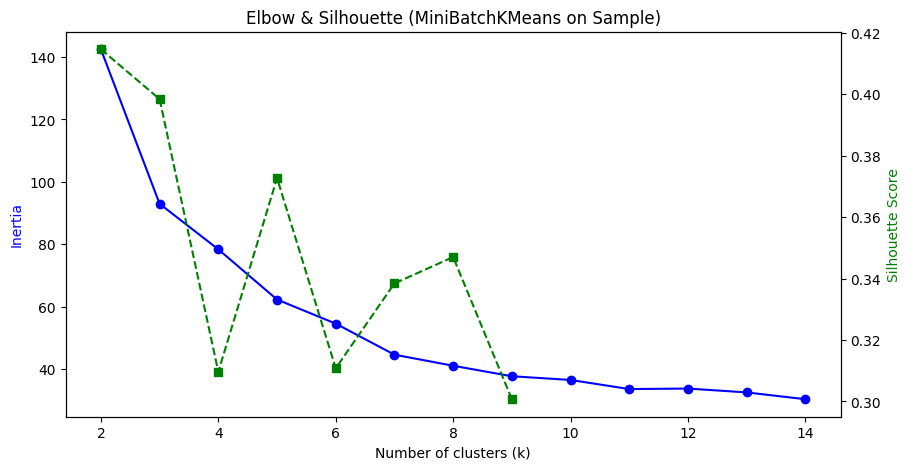

In [7]:
# !! ChatGPT Generated Code !!

# --- 1. Sample data ---
sample_size = 50000  # adjust as needed (20k–100k works well)
sample_df = t2_df.sample(n=sample_size, random_state=42)
sample_data = sample_df[['start_lat', 'start_lng', 'end_lat', 'end_lng']].values

# --- 2. Compute elbow / silhouette curves ---
inertias = []
sil_scores = []
K_range = range(2, 15)

for k in K_range:
    print(f"Running MiniBatchKMeans for k={k} ...")
    kmeans = MiniBatchKMeans(
        n_clusters=k,
        init='k-means++',
        batch_size=10000,
        n_init=5,
        max_iter=100,
        random_state=42
    )
    kmeans.fit(sample_data)
    inertias.append(kmeans.inertia_)

    # silhouette on smaller subsample for speed
    if k < 10:  
        small_idx = np.random.choice(sample_data.shape[0], 5000, replace=False)
        sil = silhouette_score(sample_data[small_idx], kmeans.predict(sample_data[small_idx]))
        sil_scores.append(sil)
    else:
        sil_scores.append(np.nan)

# --- 3. Plot ---
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(K_range, inertias, 'o-', color='blue', label='Inertia (Elbow)')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia', color='blue')

ax2 = ax1.twinx()
ax2.plot(K_range, sil_scores, 's--', color='green', label='Silhouette')
ax2.set_ylabel('Silhouette Score', color='green')

plt.title('Elbow & Silhouette (MiniBatchKMeans on Sample)')
plt.show()


In [8]:
K = 5

vanilla_kmeans = KMeans(n_clusters=K, init='random', random_state=42)
vanilla_kmeans.fit(data)

special_kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42)
special_kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [ ]:
print("Vanilla KMeans:")
print(" - Inertia:", vanilla_kmeans.inertia_)
print(" - Silhouette Score:", silhouette_score(data, vanilla_kmeans.labels_))

print("\nK-Means++:")
print(" - Inertia:", special_kmeans.inertia_)
print(" - Silhouette Score:", silhouette_score(data, special_kmeans.labels_))


Vanilla KMeans:
 - Inertia: 1171.4099900236306


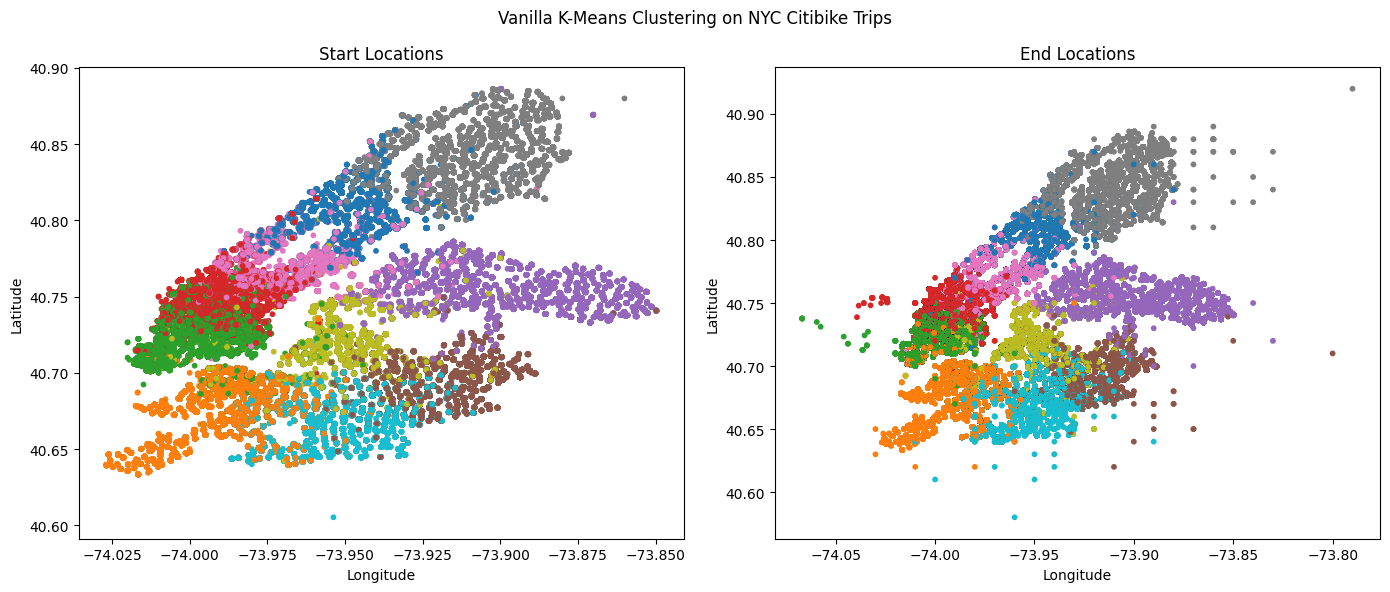

In [ ]:
# !! ChatGPT Generated Code !!

# Predict cluster labels
labels_vanilla = vanilla_kmeans.labels_
labels_special = special_kmeans.labels_

# Plot comparison side-by-side
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Vanilla K-Means
axes[0,0].scatter(t2_df['start_lng'], t2_df['start_lat'], c=labels_vanilla, s=10, cmap='tab10')
axes[0,0].set_title("Vanilla K-Means: Start Locations")
axes[0,0].set_xlabel("Longitude"); axes[0,0].set_ylabel("Latitude")

axes[0,1].scatter(t2_df['end_lng'], t2_df['end_lat'], c=labels_vanilla, s=10, cmap='tab10')
axes[0,1].set_title("Vanilla K-Means: End Locations")
axes[0,1].set_xlabel("Longitude"); axes[0,1].set_ylabel("Latitude")

# K-Means++
axes[1,0].scatter(t2_df['start_lng'], t2_df['start_lat'], c=labels_special, s=10, cmap='tab10')
axes[1,0].set_title("K-Means++: Start Locations")
axes[1,0].set_xlabel("Longitude"); axes[1,0].set_ylabel("Latitude")

axes[1,1].scatter(t2_df['end_lng'], t2_df['end_lat'], c=labels_special, s=10, cmap='tab10')
axes[1,1].set_title("K-Means++: End Locations")
axes[1,1].set_xlabel("Longitude"); axes[1,1].set_ylabel("Latitude")

plt.suptitle(f"NYC Citibike Clustering Comparison (K={K})")
plt.tight_layout()
plt.show()


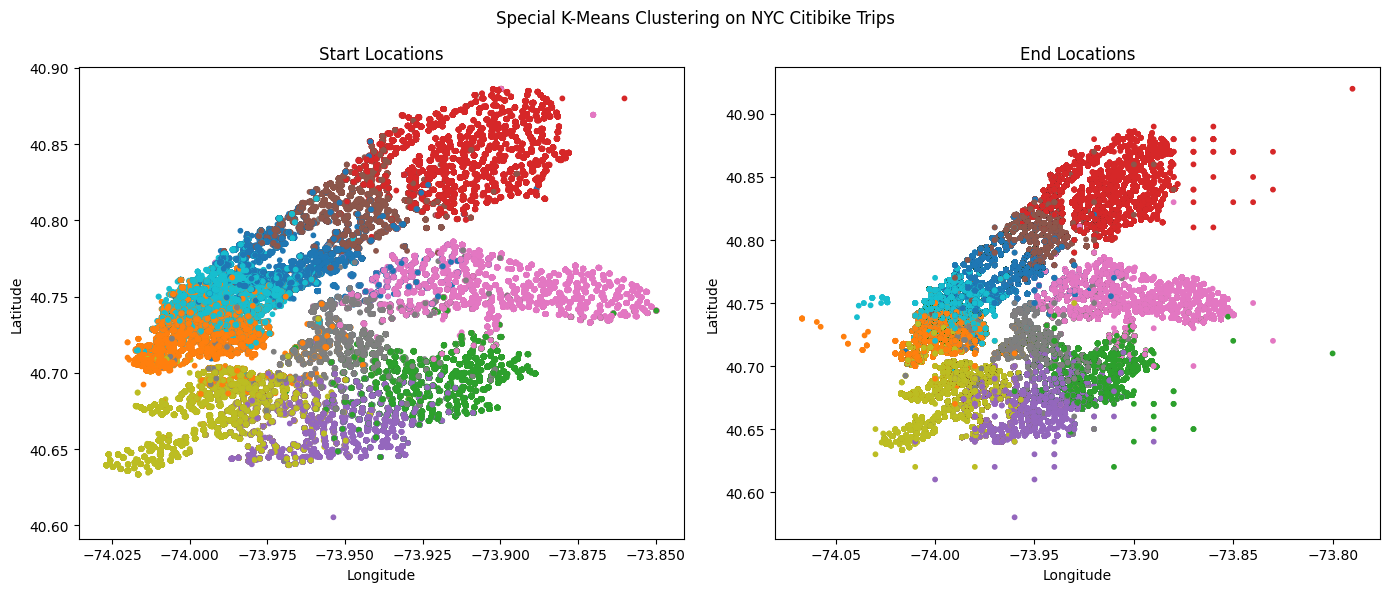

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(t2_df['start_lng'], t2_df['start_lat'], c=labels_special, s=10, cmap='tab10')
axes[0].set_title("Start Locations")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

axes[1].scatter(t2_df['end_lng'], t2_df['end_lat'], c=labels_special, s=10, cmap='tab10')
axes[1].set_title("End Locations")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.suptitle("Special K-Means Clustering on NYC Citibike Trips")
plt.tight_layout()
plt.show()


In [15]:
print(f"Random Inertia: f{vanilla_kmeans.inertia_}")
print(f"K-means++ Inertia: f{special_kmeans.inertia_}")

Random Inertia: f673.7783677816392
K-means++ Inertia: f673.8972657190718
